# Data Analysis 

In [1]:
import sys
import pickle
import pygadm
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import griddata
import numpy as np
sys.path.append("../rainpy/")

In [2]:
from rain import knn_smooth, plot_points, plot_interpolation

In [3]:
file = "../rainpy/data/data_analysis.pkl"

In [4]:
with open(file, 'rb') as f:
    data_analysis = pickle.load(f)

In [5]:
data_analysis['geometry'] = data_analysis.apply(lambda row: Point(row['long'], row['lat']), axis=1)

In [6]:
geo_data_analysis = gpd.GeoDataFrame(data_analysis.drop(["long", "lat"], axis=1), geometry="geometry", crs="EPSG:4326")

In [7]:
geo_data_analysis.head()

id                date  prec_dur  prec  prec_ind    alt  \
0  3660 2023-07-04 12:50:00         0   0.0         0  485.0   
1  7412 2023-07-04 12:50:00         0   0.0         0  340.0   
2  7374 2023-07-04 12:50:00         0   0.0         0   46.0   
3  3927 2023-07-04 12:50:00      -999   0.0      -999  630.0   
4  1103 2023-07-04 12:50:00      -999   0.0      -999  592.0   

         station_name                state                   geometry  
0   Nürburg-Barweiler      Rheinland-Pfalz   POINT (6.86970 50.36020)  
1  Neuhütten/Spessart               Bayern   POINT (9.42380 50.00830)  
2               Ahaus  Nordrhein-Westfalen   POINT (6.94090 52.08130)  
3         Pfullendorf    Baden-Württemberg   POINT (9.28690 47.93450)  
4   Ebersberg-Halbing               Bayern  POINT (11.98720 48.10030)

In [8]:
# load german border
file = "../rainpy/data/de.pkl"
with open(file, 'rb') as f:
    de = pickle.load(f)

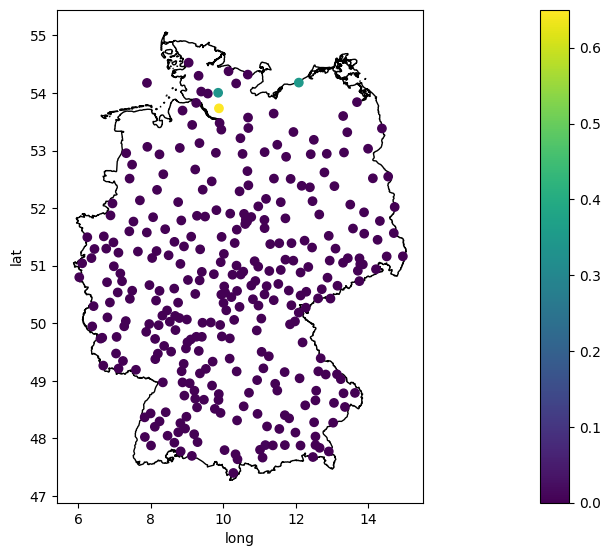

In [9]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 15))
divider = make_axes_locatable(ax)

# create `cax` for the colorbar
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the borders
de.plot(ax=ax, facecolor='white', edgecolor='black')

# Plot the rainfall at the stations and get the legend object
geo_data_analysis.plot(column='prec', ax=ax, legend=True, cax=cax)
ax.set_xlabel("long")
ax.set_ylabel("lat")

plt.show()

In [10]:
# function takes approx 30 seconds
knn_data = knn_smooth(df=data_analysis, country_df=de, variable="prec", 
           long="long", lat="lat", radius=2, grid_count=100)

In [11]:
knn_data.head()

long      lat  prec  neighbours                  geometry
0  5.866300  47.2708   NaN         0.0  POINT (5.86630 47.27080)
1  5.958982  47.2708   NaN         0.0  POINT (5.95898 47.27080)
2  6.051664  47.2708   0.0         1.0  POINT (6.05166 47.27080)
3  6.144345  47.2708   0.0         2.0  POINT (6.14435 47.27080)
4  6.237027  47.2708   0.0         3.0  POINT (6.23703 47.27080)

In [12]:
knn_data["prec"].unique()

array([           nan, 0.00000000e+00, 2.38095238e-04, 2.22222222e-04,
       2.32558140e-04, 2.27272727e-04, 2.43902439e-04, 2.56410256e-04,
       2.50000000e-04, 2.63157895e-04, 2.70270270e-04, 2.77777778e-04,
       2.85714286e-04, 2.94117647e-04, 3.03030303e-04, 3.12500000e-04,
       3.22580645e-04, 3.33333333e-04, 3.57142857e-04, 2.12765957e-04,
       2.17391304e-04, 3.44827586e-04, 2.08333333e-04, 2.04081633e-04,
       3.70370370e-04, 2.00000000e-04, 1.96078431e-04, 1.92307692e-04,
       1.88679245e-04, 1.81818182e-04, 1.85185185e-04, 1.78571429e-04,
       1.75438596e-04, 1.72413793e-04, 1.66666667e-04, 1.69491525e-04,
       1.63934426e-04, 1.58730159e-04, 1.61290323e-04, 1.53846154e-04,
       1.49253731e-04, 1.51515152e-04, 1.47058824e-04, 1.42857143e-04,
       1.44927536e-04, 1.40845070e-04, 1.38888889e-04, 1.36986301e-04,
       1.33333333e-04, 1.35135135e-04, 1.56250000e-04, 1.31578947e-04,
       1.26582278e-04, 1.25000000e-04, 1.28205128e-04, 1.23456790e-04,
      

In [13]:
fig = plot_points(df=knn_data, country_df=de, variable="prec", markersize=4)

In [14]:
fig

In [15]:
temp_data = gpd.sjoin(knn_data, de, predicate="within")
temp_data = temp_data[knn_data.columns]

In [16]:
plt.hist(x=temp_data["neighbours"], bins=30, rwidth=0.9)
plt.show()

## Plotting function to create smooth surface 

### Use cubic spline interpolation 

In [17]:
sub_data = knn_data.dropna(subset=['prec'])

In [19]:
fig = plot_interpolation(sub_data, de, variable="prec", n=150)

In [20]:
fig